<a href="https://colab.research.google.com/github/beccacauthorn/datastorytelling/blob/main/Utilizing_Data_For_Storytelling_How_Player_Age_Affects_Team_Success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
players_fn = 'https://ndownloader.figshare.com/files/15073721'
teams_fn = 'https://ndownloader.figshare.com/files/15073697'
matches_fn = 'https://beccacauthorn.github.io/img/matches_World_Cup.json'

In [ ]:
players = pd.read_json(players_fn, orient='records')

In [ ]:
players.dtypes

passportArea             object
weight                    int64
firstName                object
middleName               object
lastName                 object
currentTeamId            object
birthDate                object
height                    int64
role                     object
birthArea                object
wyId                      int64
foot                     object
shortName                object
currentNationalTeamId    object
dtype: object

In [ ]:
players[['firstName', 'lastName', 'birthDate', 'currentNationalTeamId']].isnull().sum()

firstName                0
lastName                 0
birthDate                0
currentNationalTeamId    0
dtype: int64

In [ ]:
# Build the per-player dataframe by slicing/selecting the players dataframe
players_new = players[['firstName', 'lastName', 'birthDate', 'currentNationalTeamId']]

In [ ]:
players_new.shape

(3603, 4)

In [ ]:
# matches = pd.read_json(matches_fn, orient= 'records') this gave columns with dictionaries and a lot of nesting so did not work properly
#opening json file into a list

import requests
matches_list = requests.get(matches_fn).json()



In [ ]:
#to see structure of the list
for k,v in matches_list[0].items():
  print(k, v)

status Played
roundId 4165368
gameweek 0
teamsData {'9598': {'scoreET': 0, 'coachId': 122788, 'side': 'away', 'teamId': 9598, 'score': 2, 'scoreP': 0, 'hasFormation': 1, 'formation': {'bench': [{'playerId': 69964, 'assists': '0', 'goals': 'null', 'ownGoals': '0', 'redCards': '0', 'yellowCards': '0'}, {'playerId': 69353, 'assists': '0', 'goals': 'null', 'ownGoals': '0', 'redCards': '0', 'yellowCards': '0'}, {'playerId': 212604, 'assists': '0', 'goals': 'null', 'ownGoals': '0', 'redCards': '0', 'yellowCards': '0'}, {'playerId': 69400, 'assists': '0', 'goals': 'null', 'ownGoals': '0', 'redCards': '0', 'yellowCards': '0'}, {'playerId': 230626, 'assists': '0', 'goals': 'null', 'ownGoals': '0', 'redCards': '0', 'yellowCards': '0'}, {'playerId': 69404, 'assists': '0', 'goals': 'null', 'ownGoals': '0', 'redCards': '0', 'yellowCards': '0'}, {'playerId': 135784, 'assists': '0', 'goals': 'null', 'ownGoals': '0', 'redCards': '0', 'yellowCards': '0'}, {'playerId': 14771, 'assists': '0', 'goals': 'n

In [ ]:
# Use a list comprehension to iterate over the list and obtain another list
# Get the teamId of only those teams that played in the WC
teamIds = [list(match['teamsData'].keys()) for match in matches_list]
teamIds_world_cup = np.unique(np.array(teamIds))

In [ ]:
teams_df = pd.DataFrame({'WorldCupTeamIDs': teamIds_world_cup})
teams_df.head()

,WorldCupTeamIDs
0,10840
1,12274
2,12430
3,12913
4,13869


In [ ]:
# step 2. get the players corresponding to World Cup teams
players_new['currentNationalTeamIdStr'] = players_new.currentNationalTeamId.astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
players_new.shape

(3603, 5)

In [ ]:
#Group the player dataframe by teamId 
players_teams_merged = pd.merge(players_new, teams_df, left_on='currentNationalTeamIdStr', right_on= 'WorldCupTeamIDs', how='inner')
players_teams_merged.shape

(744, 6)

In [ ]:
player_age = (pd.Timestamp('2018-06-14') - pd.to_datetime(players_teams_merged['birthDate'])) / np.timedelta64(1, 'Y')

In [ ]:
players_teams_merged['player_age'] = player_age

In [ ]:
players_teams_merged.head()

,firstName,lastName,birthDate,currentNationalTeamId,currentNationalTeamIdStr,WorldCupTeamIDs,player_age
0,Alfred John Momar,N'Diaye,1990-03-06,19314,19314,19314,28.274366
1,Cheikhou,Kouyat\u00e9,1989-12-21,19314,19314,19314,28.479709
2,Papa Alioune,N'Diaye,1990-10-27,19314,19314,19314,27.630958
3,Mame Biram,Diouf,1987-12-16,19314,19314,19314,30.494808
4,Adama,Mbengue,1993-12-01,19314,19314,19314,24.534385


In [ ]:
# groupby currentNationalTeamId and take average age
team_age_mean = players_teams_merged.groupby(by='WorldCupTeamIDs')[['player_age']].mean()
team_age_mean.player_age = pd.to_numeric(team_age_mean.player_age)

In [ ]:
team_age_mean.head()

,player_age
WorldCupTeamIDs,
10840,27.231461
12274,28.826814
12430,27.960738
12913,28.594939
13869,28.110091


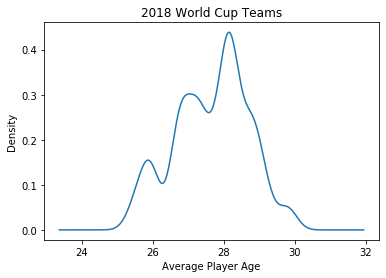

In [ ]:
team_age_mean.player_age.plot.kde(bw_method=0.25)
plt.title('2018 World Cup Teams');
plt.xlabel('Average Player Age');

In [ ]:
winner_list = [str(match['winner']) for match in matches_list]

In [ ]:
winner_df = pd.DataFrame({'WorldCupTeamIDs': winner_list})

In [ ]:
wins = winner_df.groupby('WorldCupTeamIDs')['WorldCupTeamIDs'].count()

In [ ]:
wins.shape

(27,)

In [ ]:
#assigning new column to team_age_mean dataframe
team_age_mean['wins'] = wins

In [ ]:
team_age_mean.isnull().sum()

player_age    0
wins          6
dtype: int64

In [ ]:
team_age_mean['wins'] = team_age_mean['wins'].fillna(0)

In [ ]:
team_age_mean.isnull().sum()

player_age    0
wins          0
dtype: int64

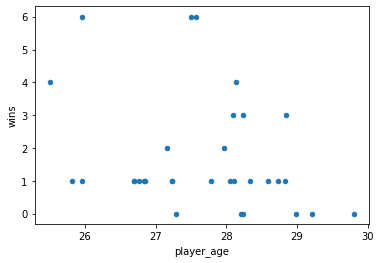

In [ ]:
team_age_mean.plot(x ='player_age', y='wins', kind='scatter')


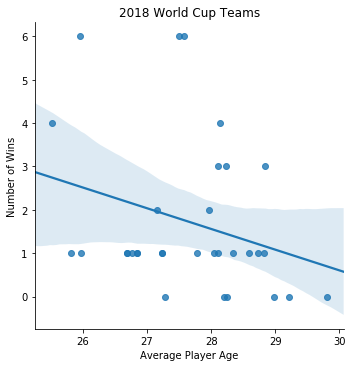

In [ ]:
sns.lmplot('player_age', 'wins', data=team_age_mean,fit_reg=True);
plt.title('2018 World Cup Teams');
plt.xlabel('Average Player Age');
plt.ylabel('Number of Wins');


In [ ]:
#reducing survivor bias due to competition being a knockout competition, running same code on league competition in England due 
#to all teams playing the same number of matches 

In [ ]:
teams = pd.read_json(teams_fn, orient='records')

In [ ]:
teams.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [ ]:
teams.loc[0]['area']

{'alpha2code': '', 'alpha3code': 'XEN', 'id': '0', 'name': 'England'}

In [ ]:
# given one of the dictionaries in the area column, say area_dict, we want to extract
# area_dict['name']
# and we want to do that for each row
# So we want to apply the following function to each value in the area column:
def my_function(area_dict):
  return area_dict['name']

teams['country'] = teams['area'].apply(my_function)

In [ ]:
teams.head()

,city,name,wyId,officialName,area,type,country
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain


In [ ]:
teams_england = teams[teams['country']=='England']
teams_england.head(20)

,city,name,wyId,officialName,area,type,country
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
26,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
27,"Brighton, East Sussex",Brighton & Hove Albion,1651,Brighton & Hove Albion FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
39,"Burnley, Lancashire",Burnley,1646,Burnley FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
54,Leicester,Leicester City,1631,Leicester City FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
55,London,West Ham United,1633,West Ham United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
56,Stoke-on-Trent,Stoke City,1639,Stoke City FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
60,Watford,Watford,1644,Watford FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
65,Liverpool,Everton,1623,Everton FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England


In [ ]:
teams_england_id = teams_england[['wyId', 'country']]

In [ ]:
teams_england_id.head()

,wyId,country
0,1613,England
8,1673,England
26,1659,England
27,1651,England
39,1646,England


In [ ]:
players_by_club_team = players[['birthDate', 'currentTeamId']]

In [ ]:
england_players = pd.merge(teams_england_id, players_by_club_team, left_on='wyId', right_on='currentTeamId', how='inner')

In [ ]:
#create column of age in years, use mid-point of club season which would be Jan 2018
pd.Timestamp('2018-01-01')

Timestamp('2018-01-01 00:00:00')

In [ ]:
england_player_age = (pd.Timestamp('2018-01-01') - pd.to_datetime(england_players['birthDate'])) / np.timedelta64(1, 'Y')

In [ ]:
england_players['player_age'] = player_age

In [ ]:
club_team_age_mean = england_players.groupby(by='currentTeamId')[['player_age']].mean()
club_team_age_mean.player_age = pd.to_numeric(club_team_age_mean.player_age)

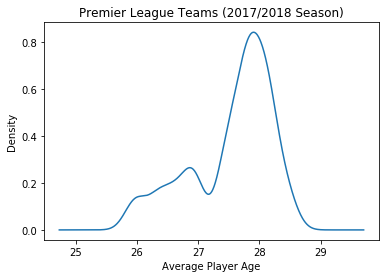

In [ ]:
club_team_age_mean.player_age.plot.kde(bw_method=0.25)
plt.title('Premier League Teams (2017/2018 Season)');
plt.xlabel('Average Player Age');


In [ ]:
club_team_age_mean.shape

(19, 1)

In [ ]:
matches_england_fn = 'https://beccacauthorn.github.io/img/matches_England.json'

In [ ]:
england_matches = pd.read_json(matches_england_fn, orient='records')

In [ ]:
england_matches.head(30)

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364
5,Played,4405654,38,"{'1613': {'scoreET': 0, 'coachId': 210700, 'si...",181150,2018-05-13 14:00:00,1613,St. James' Park,2500094,"Newcastle United - Chelsea, 3 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384888, 'role': 'referee'}, {'r...",Regular,364
6,Played,4405654,38,"{'1625': {'scoreET': 0, 'coachId': 267136, 'si...",181150,2018-05-13 14:00:00,1625,St. Mary's Stadium,2500095,"Southampton - Manchester City, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385911, 'role': 'referee'}, {'r...",Regular,364
7,Played,4405654,38,"{'10531': {'scoreET': 0, 'coachId': 32573, 'si...",181150,2018-05-13 14:00:00,1639,Liberty Stadium,2500096,"Swansea City - Stoke City, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 378952, 'role': 'referee'}, {'r...",Regular,364
8,Played,4405654,38,"{'1631': {'scoreET': 0, 'coachId': 209010, 'si...",181150,2018-05-13 14:00:00,1624,Wembley Stadium,2500097,"Tottenham Hotspur - Leicester City, 5 - 4","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 378951, 'role': 'referee'}, {'r...",Regular,364
9,Played,4405654,38,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",181150,2018-05-13 14:00:00,1633,London Stadium,2500098,"West Ham United - Everton, 3 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 408156, 'role': 'referee'}, {'r...",Regular,364


In [ ]:
england_matches_winners = pd.DataFrame(england_matches['winner'].value_counts())

In [ ]:
england_matches_winners.head()

,winner
0,101
1625,32
1611,25
1624,23
1610,21


In [ ]:
club_wins_merged = pd.merge(club_team_age_mean, england_matches_winners, left_on='currentTeamId', right_index=True, how='inner')
club_wins_merged.head()

,player_age,winner
currentTeamId,,
1609,28.131173,19
1610,27.948783,21
1611,27.776181,25
1612,27.469919,21
1613,26.863089,12


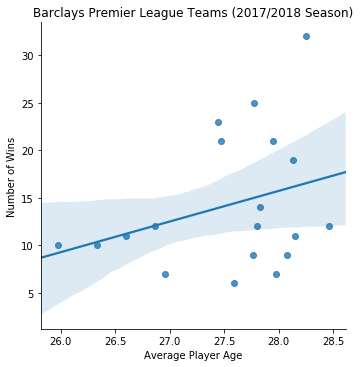

In [ ]:
sns.lmplot('player_age', 'winner', data=club_wins_merged,fit_reg=True);
plt.title('Barclays Premier League Teams (2017/2018 Season)');
plt.xlabel('Average Player Age');
plt.ylabel('Number of Wins');

In [ ]:
#I got total points data per team for the 2017/2018 season on the official Barclay's Premier league website: https://www.premierleague.com/tables?co=1&se=79&ha=-1
#Swansea city data not included in dataset 
points_data = {'team_id': [	1613, 1673, 1659, 1651, 1646, 1631, 1633, 1639, 1644, 1623, 1627, 1625, 1624, 1628, 1619, 1612, 1610, 1611, 1609], 'total_points': [44, 37, 44, 40, 54, 47, 42, 33, 41, 49, 31, 100, 77, 44, 36, 75, 70, 81, 63]}
total_points_per_team = pd.DataFrame.from_dict(points_data, orient='columns')

In [ ]:
teams_total_points_merged = pd.merge(club_team_age_mean, total_points_per_team , left_on='currentTeamId', right_on='team_id', how='inner')

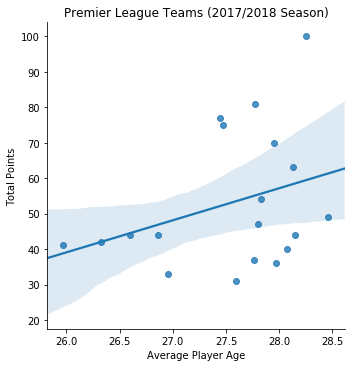

In [ ]:
sns.lmplot('player_age', 'total_points', data=teams_total_points_merged,fit_reg=True);
plt.title('Premier League Teams (2017/2018 Season)');
plt.xlabel('Average Player Age');
plt.ylabel('Total Points');